In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

#Function

In [ ]:
def plot_loss(history):
  history_dataframe = pd.DataFrame(history.history)

  min_loss_index = history_dataframe[history_dataframe['loss']==min(history_dataframe['loss'])].index.values
  min_loss = history_dataframe.loc[min_loss_index]['loss']
  min_val_loss_index = history_dataframe[history_dataframe['val_loss']==min(history_dataframe['val_loss'])].index.values
  min_val_loss = history_dataframe.loc[min_val_loss_index]['val_loss']

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(min_loss_index, min_loss, 'o', c='k', ms=4, label='min loss')
  plt.plot(min_val_loss_index, min_val_loss, 'o', c='k', ms=4, label='min val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)
  plt.show()

  print("Minimun Loss :", min_loss)
  print("---------------------------------------")
  print("Minimun Validation Loss :", min_val_loss)

In [ ]:
def algo_evaluation(model):
  predictions = model.predict(feature_test)
  predictions = predictions.flatten()

  print("MSE (Mean Squared Error)         -> ", mean_squared_error(label_test, predictions))
  print("MAE (Mean Absolute Error)        -> ", mean_absolute_error(label_test, predictions))
  print("r^2 score                        -> ", r2_score(label_test, predictions))
  print('RMSE (Root Mean Squared Error)   -> ', np.sqrt(mean_squared_error(label_test, predictions)))

In [ ]:
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)

#Data Cleaning

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab_Test/Dataset/6. Deep Learning/auto.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

In [ ]:
dataset.drop(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'curb-weight', 'engine-type', 'num-of-cylinders', ' engine-size', 'fuel-system', 'horsepower', 'city-mpg', 'highway-mpg'], axis=1, inplace=True)

In [ ]:
dataset.replace("?", np.nan, inplace=True)

In [ ]:
dataset.isnull().sum()

wheel-base           0
length               0
width                0
height               0
bore                 4
stroke               4
compression-ratio    0
peak-rpm             2
price                4
dtype: int64

In [ ]:
avg_bore = dataset['bore'].astype(float).mean(axis=0)
avg_stroke = dataset['stroke'].astype(float).mean(axis=0)
avg_peak = dataset['peak-rpm'].astype(float).mean(axis=0)

In [ ]:
dataset['bore'].replace(np.nan, avg_bore, inplace=True)
dataset['stroke'].replace(np.nan, avg_stroke, inplace=True)
dataset['peak-rpm'].replace(np.nan, avg_peak, inplace=True)

In [ ]:
dataset.dropna(subset=['price'], axis=0, inplace=True)
dataset.isnull().sum()

wheel-base           0
length               0
width                0
height               0
bore                 0
stroke               0
compression-ratio    0
peak-rpm             0
price                0
dtype: int64

In [ ]:
dataset[['bore', 'stroke','price', 'peak-rpm']] = dataset[['bore', 'stroke','price', 'peak-rpm']].astype(float)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         201 non-null    float64
 1   length             201 non-null    float64
 2   width              201 non-null    float64
 3   height             201 non-null    float64
 4   bore               201 non-null    float64
 5   stroke             201 non-null    float64
 6   compression-ratio  201 non-null    float64
 7   peak-rpm           201 non-null    float64
 8   price              201 non-null    float64
dtypes: float64(9)
memory usage: 15.7 KB


#EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad14e6c208>,
      dtype=object)

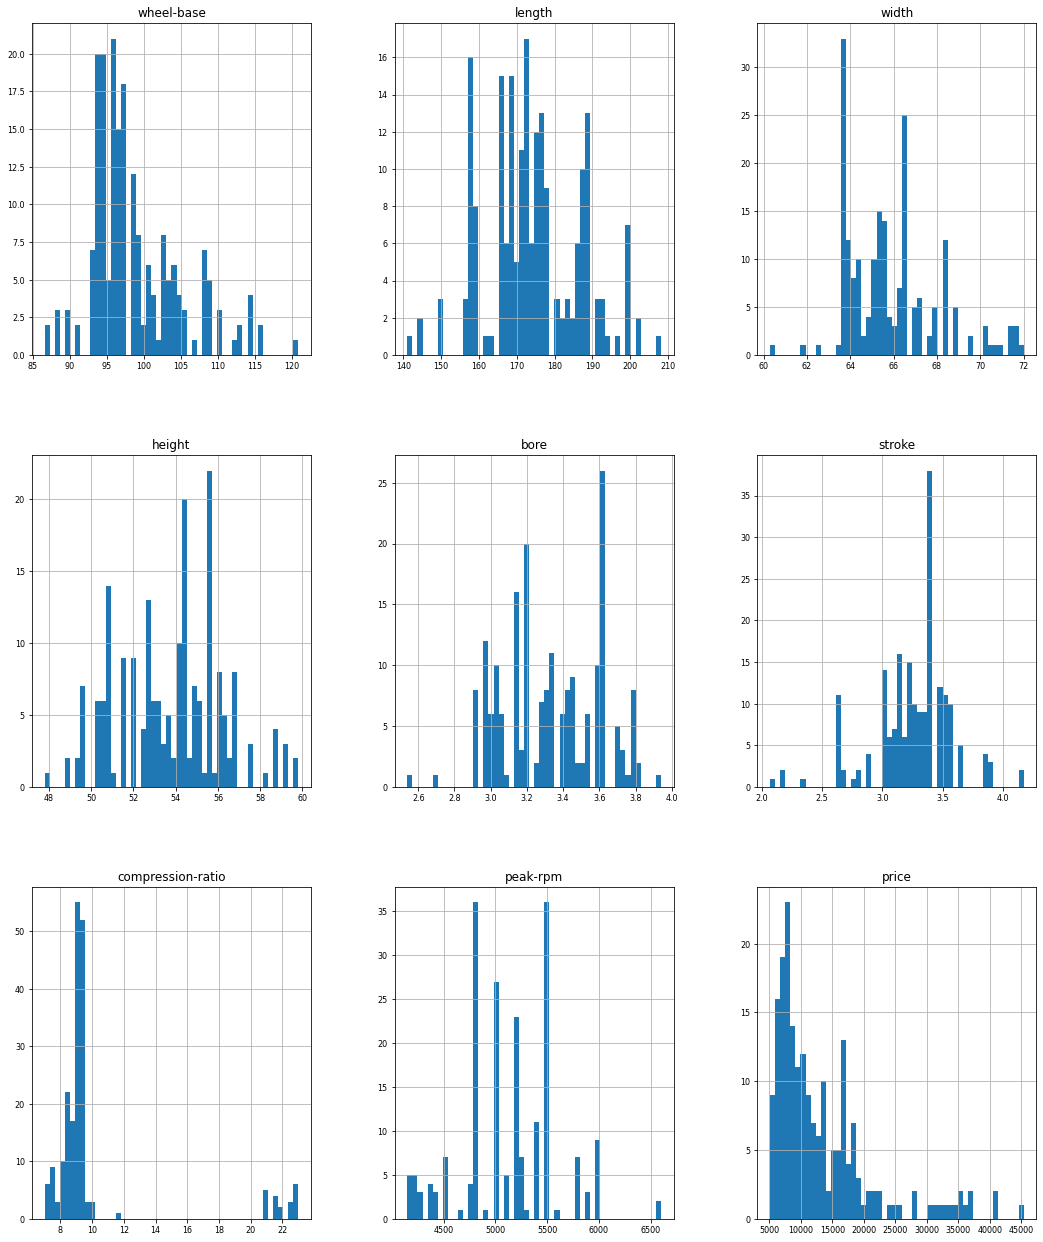

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
corr = dataset.corr()

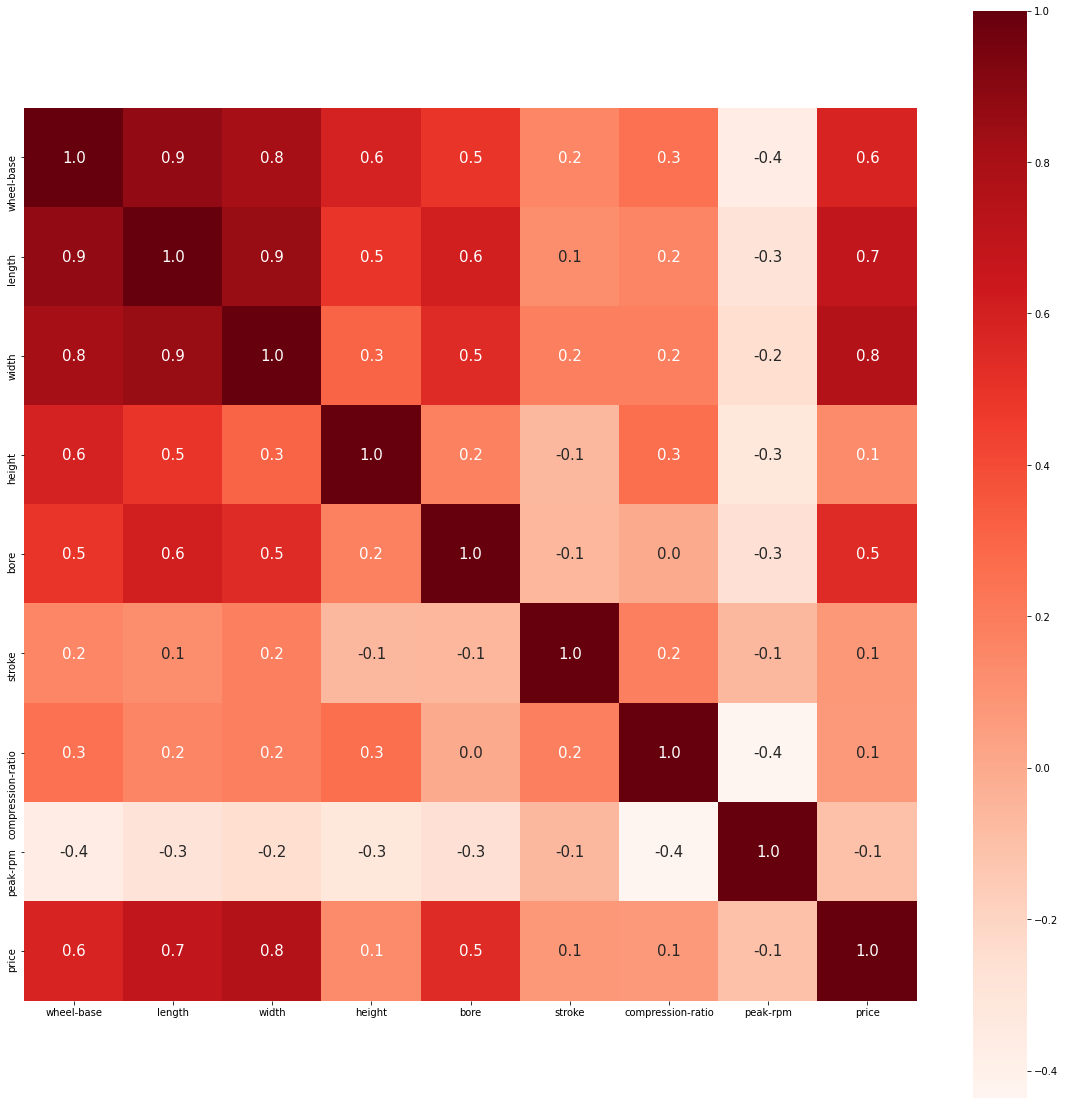

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds')

#Split Data

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
label = dataset['price']
features = dataset.drop(['price'], axis=1)

In [ ]:
scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

In [ ]:
model = LinearRegression()
model.fit(feature_train, label_train)
algo_evaluation(model)

MSE (Mean Squared Error)         ->  0.244769250439587
MAE (Mean Absolute Error)        ->  0.37372756360580484
r^2 score                        ->  0.6582019578480833
RMSE (Root Mean Squared Error)   ->  0.49474159966550924


#Deep Learning


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf, random

##Baseline Model

In [ ]:
base_model = Sequential()
base_model.add(Dense(200, input_dim=8, kernel_initializer='normal', activation='relu'))
base_model.add(Dense(1, kernel_initializer='normal'))

base_model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
base_history = base_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
20/20 [==============================] - 0s 6ms/step - loss: 0.8138 - val_loss: 0.4840
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5243 - val_loss: 0.4230
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4210 - val_loss: 0.3892
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3724 - val_loss: 0.3437
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3412 - val_loss: 0.3045
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3150 - val_loss: 0.2876
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2985 - val_loss: 0.2679
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2731 - val_loss: 0.2519
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2608 - val_loss: 0.2381
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2521 - val_loss: 0.2287
Epoch 11/50
20/20 [

In [ ]:
predictions = base_model.predict(feature_test)
predictions = predictions.flatten()
algo_evaluation(base_model)

MSE (Mean Squared Error)         ->  0.18472741800717976
MAE (Mean Absolute Error)        ->  0.2992605920570615
r^2 score                        ->  0.7420449272396796
RMSE (Root Mean Squared Error)   ->  0.4297992764153748


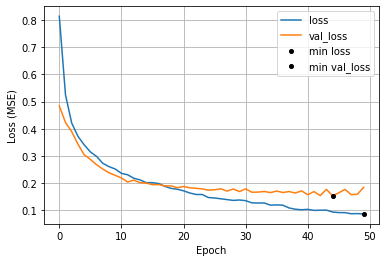

Minimun Loss : 49    0.086965
Name: loss, dtype: float64
---------------------------------------
Minimun Validation Loss : 44    0.153891
Name: val_loss, dtype: float64


In [ ]:
plot_loss(base_history)

##Deeper Model

In [ ]:
deeper_model = Sequential()
deeper_model.add(Dense(200, input_dim=8, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(100, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_deeper_model = deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
20/20 [==============================] - 0s 7ms/step - loss: 0.9024 - val_loss: 0.5083
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5193 - val_loss: 0.4310
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4090 - val_loss: 0.3160
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3255 - val_loss: 0.2627
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2873 - val_loss: 0.2279
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2605 - val_loss: 0.2062
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2408 - val_loss: 0.1967
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2092 - val_loss: 0.1820
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1823 - val_loss: 0.1704
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1772 - val_loss: 0.1895
Epoch 11/50
20/20 [

In [ ]:
predictions = deeper_model.predict(feature_test)
predictions = predictions.flatten()
algo_evaluation(deeper_model)

MSE (Mean Squared Error)         ->  0.1625084967728607
MAE (Mean Absolute Error)        ->  0.2618552404313905
r^2 score                        ->  0.7730716340787902
RMSE (Root Mean Squared Error)   ->  0.4031234262268328


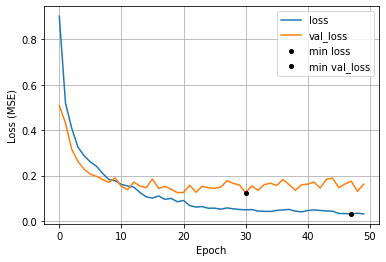

Minimun Loss : 47    0.031171
Name: loss, dtype: float64
---------------------------------------
Minimun Validation Loss : 30    0.124687
Name: val_loss, dtype: float64


In [ ]:
plot_loss(history_deeper_model)

##Wider Model

In [ ]:
wider_model = Sequential()
wider_model.add(Dense(200, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_wider_model = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 0.8396 - val_loss: 0.5312
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5558 - val_loss: 0.4714
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4400 - val_loss: 0.4390
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3844 - val_loss: 0.3863
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3503 - val_loss: 0.3386
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3218 - val_loss: 0.3158
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3026 - val_loss: 0.2940
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2781 - val_loss: 0.2742
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2643 - val_loss: 0.2584
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2555 - val_loss: 0.2460
Epoch 11/

In [ ]:
predictions = wider_model.predict(feature_test)
predictions = predictions.flatten()
algo_evaluation(wider_model)

MSE (Mean Squared Error)         ->  0.18432380789898523
MAE (Mean Absolute Error)        ->  0.2872004902695178
r^2 score                        ->  0.7426085321227516
RMSE (Root Mean Squared Error)   ->  0.42932948640756696


#Kesimpulan

## **Dari data diatas, dari pengujian 3 model yaitu Baseline Model, Deeper Model, dan Wilder Model dengan perbandingan 0.74 : 0.77 : 0.74. Didapatkan Deeper Model yang terbaik sehingga dapat dijadikan bahan pengujian dengan menambahkan Optimizer.**

#Input Optimizer

In [ ]:
from tensorflow.keras.optimizers import SGD

##SGD

In [ ]:
deeper_model_tuned = Sequential()
deeper_model_tuned.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
deeper_model_tuned.add(Dense(4, kernel_initializer='normal', activation='relu'))
deeper_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.99)

deeper_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

deeper_model_tuned.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_57 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_tuned_sgd = deeper_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 1.0715 - val_loss: 0.7208
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0707 - val_loss: 0.7258
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0705 - val_loss: 0.7227
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0653 - val_loss: 0.7216
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0583 - val_loss: 0.7184
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0447 - val_loss: 0.7111
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9978 - val_loss: 0.6844
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8896 - val_loss: 0.6214
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6258 - val_loss: 0.6220
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6356 - val_loss: 0.5308
Epoch 11/

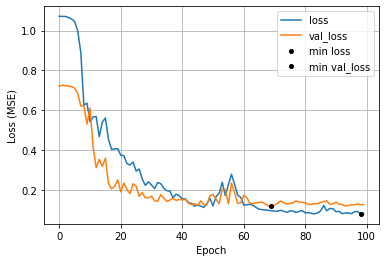

Minimun Loss : 98    0.080028
Name: loss, dtype: float64
---------------------------------------
Minimun Validation Loss : 69    0.117966
Name: val_loss, dtype: float64


In [ ]:
plot_loss(history_tuned_sgd)

##RMSprop

In [ ]:
from tensorflow.keras.optimizers import RMSprop
random
deeper_model_tuned_rmsprop = Sequential()
deeper_model_tuned_rmsprop.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
deeper_model_tuned_rmsprop.add(Dense(4, kernel_initializer='normal', activation='relu'))
deeper_model_tuned_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

deeper_model_tuned_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

deeper_model_tuned_rmsprop.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_65 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_tuned_rmsprop = deeper_model_tuned_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 1.0719 - val_loss: 0.7193
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0694 - val_loss: 0.7169
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0656 - val_loss: 0.7125
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0585 - val_loss: 0.7055
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0473 - val_loss: 0.6952
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0325 - val_loss: 0.6834
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0150 - val_loss: 0.6694
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9935 - val_loss: 0.6517
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9664 - val_loss: 0.6311
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9352 - val_loss: 0.6088
Epoch 11/

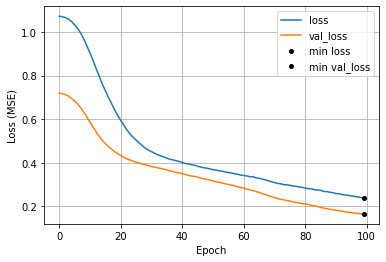

Minimun Loss : 99    0.238307
Name: loss, dtype: float64
---------------------------------------
Minimun Validation Loss : 99    0.16567
Name: val_loss, dtype: float64


In [ ]:
plot_loss(history_tuned_rmsprop)

#Kesimpulan : 

## Pada pengujian diatas, dimana Deeper Model diuji dengan ditambahkan optimizer dan didapatkan SGD yang terbaik pada pengujian ini dibandingkan RMSprop dan Adam. yang mana MSE didapatkan 0.1 dan paling kecil dibandingkan yang lain